<a href="https://colab.research.google.com/github/Hujaifa98/AIProjects/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data' , names = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Class'])

In [ ]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Target'] = pd.factorize(df.Class)[0]

In [ ]:
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class,Target
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


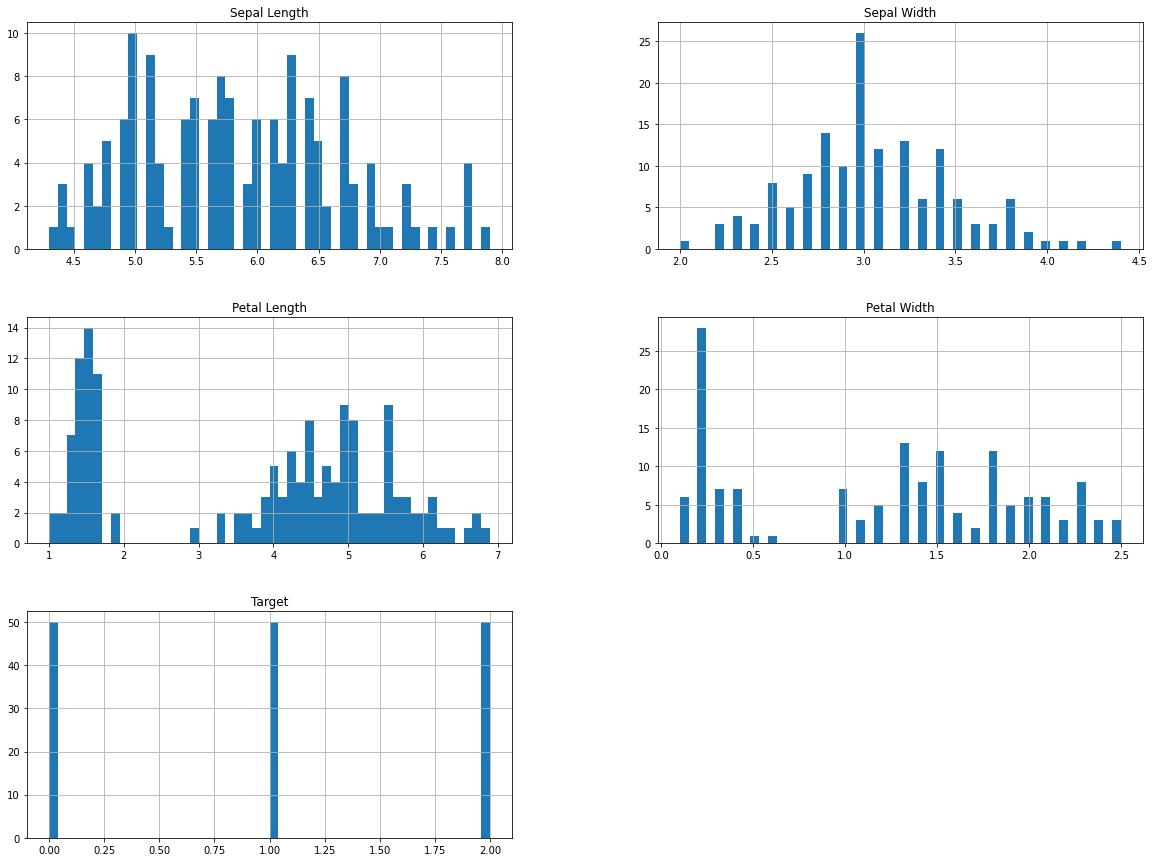

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
corr = df.corr()

In [ ]:
corr

,Sepal Length,Sepal Width,Petal Length,Petal Width,Target
Sepal Length,1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal Length,0.871754,-0.420516,1.000000,0.962757,0.949043
Petal Width,0.817954,-0.356544,0.962757,1.000000,0.956464
Target,0.782561,-0.419446,0.949043,0.956464,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.2)

In [ ]:
x_train , y_train = train_set.drop(['Class','Target'] , axis=1) , train_set['Target']
x_test , y_test = test_set.drop(['Class','Target'] , axis=1) , test_set['Target']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train[0].shape

(4,)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Dense(16,activation='relu',input_shape=x_train[0].shape),
                                 keras.layers.Dense(32,activation='relu'),
                                 keras.layers.Dense(3,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                80        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['Accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs=500,validation_data=(x_test,y_test))

Epoch 1/500
4/4 [==============================] - 1s 57ms/step - loss: 1.2653 - Accuracy: 0.0083 - val_loss: 1.2725 - val_Accuracy: 0.0000e+00
Epoch 2/500
4/4 [==============================] - 0s 13ms/step - loss: 1.2325 - Accuracy: 0.0083 - val_loss: 1.2397 - val_Accuracy: 0.0000e+00
Epoch 3/500
4/4 [==============================] - 0s 10ms/step - loss: 1.2018 - Accuracy: 0.0917 - val_loss: 1.2090 - val_Accuracy: 0.1000
Epoch 4/500
4/4 [==============================] - 0s 11ms/step - loss: 1.1727 - Accuracy: 0.2083 - val_loss: 1.1808 - val_Accuracy: 0.3000
Epoch 5/500
4/4 [==============================] - 0s 9ms/step - loss: 1.1459 - Accuracy: 0.3083 - val_loss: 1.1543 - val_Accuracy: 0.3333
Epoch 6/500
4/4 [==============================] - 0s 12ms/step - loss: 1.1203 - Accuracy: 0.3417 - val_loss: 1.1297 - val_Accuracy: 0.3333
Epoch 7/500
4/4 [==============================] - 0s 9ms/step - loss: 1.0957 - Accuracy: 0.3500 - val_loss: 1.1061 - val_Accuracy: 0.3333
Epoch 8/500
4/

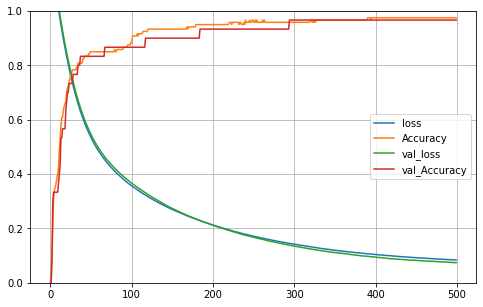

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()